# Digit Number

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import numpy as np

np.random.seed(4)

## Dataset

In [34]:

mnist = fetch_openml('mnist_784')
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int)


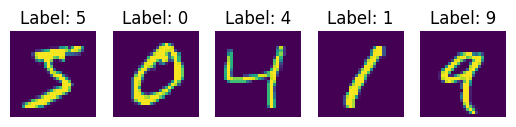

In [35]:
# show
num_imgs = 5
fig, axes = plt.subplots(1, num_imgs)
for i in range(num_imgs):
    axes[i].imshow(X[i].reshape(28,28))
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.show()

## Pre-Processing

In [36]:
y_ohe = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
def sigmoid(x):
    x = np.clip(x, -100, 100)
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

In [38]:
def forward_prop(w1, w2, b1, b2, x):
    # IMPLEMENT HERE
    z1 = x @ w1 + b1
    h1 = sigmoid(z1)
    
    z2 = h1 @ w2 + b2
    y_hat = sigmoid(z2)
    
    return z1, h1, z2, y_hat

def back_prop(m,w1,w2,z1,h1,z2,y_hat,x,y):
    # IMPLEMENT HERE
    dz2 = y_hat - y
    dw2 = h1.T @ dz2
    db2 = np.ones((1,m)) @ dz2 / m
    
    dz1 = (dz2 @ w2.T) * sigmoid_prime(h1)
    dw1 = x.T @ dz1
    
    db1 = np.ones((1, m)) @ dz1 / m
    
    return dw1, db1, dw2, db2

## Initialization

In [39]:
## Initialize weights
n_x = X_train.shape[1]
n_y = y_train.shape[1]
n_h = 100

w1 = np.random.rand(n_x, n_h) - 0.5
w2 = np.random.rand(n_h, n_y) - 0.5
b1 = np.random.rand(1, n_h) - 0.5
b2 = np.random.rand(1, n_y) - 0.5

## Main Loop

In [40]:
epoch = 30
losses = []
m = y_train.shape[0]        # of data set
lr = 0.01                   # Learning rate

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)
for i in range(epoch):
    ## IMPLEMENT HERE
    z1, a1, z2, y_hat = forward_prop(w1, w2, b1, b2, X_train)
    loss = -(1/m)*np.sum(y_train*np.log(y_hat + 1e-10) + (1-y_train)*np.log(1-y_hat + 1e-10))

    losses.append(loss)

    dw1, db1, dw2, db2 = back_prop(m, w1, w2, z1, a1, z2, y_hat, X_train, y_train)

    w2 = w2 - lr*dw2
    w1 = w1 - lr*dw1
    b2 = b2 - lr*db2
    b1 = b1 - lr*db1

    print(w1[0, :5])
    print(w2[0, :5])
    print(f'loss: {loss}')

# TEST
_, _, _, y_test_hat = forward_prop(w1, w2, b1, b2, X_test)
y_test_hat_true = np.argmax(y_test_hat, axis=1)
accuracy = accuracy_score(y_test_true, y_test_hat_true)
print(f'loss: {loss:.2f}, acc: {accuracy:.2f}')

[0.46702984 0.04723225 0.47268436 0.21481599 0.19772882]
[-161.66130982 -163.70189403   16.51467468  -71.39244543  -26.24197712]
loss: 7.862787070527112
[0.46702984 0.04723225 0.47268436 0.21481599 0.19772882]
[-158.70690378 -101.04184665 -210.8628714   -48.43189867   -8.27378699]
loss: 41.457222246718935
[0.46702984 0.04723225 0.47268436 0.21481599 0.19772882]
[-145.99672011  -39.4626369  -157.2763625   -24.56782218 -240.71598095]
loss: 41.2193960200146
[0.46702984 0.04723225 0.47268436 0.21481599 0.19772882]
[-142.93656721   22.35124192 -106.26403752   -9.41641813 -212.30222723]
loss: 44.32221337081786
[0.46702984 0.04723225 0.47268436 0.21481599 0.19772882]
[-141.42818792   70.85048136  -59.24762566   17.96472086 -202.21564911]
loss: 24.244484037974555
[0.46702984 0.04723225 0.47268436 0.21481599 0.19772882]
[-146.4726122    14.79937497  -25.33229562    9.32239014 -195.99331446]
loss: 25.085660773791982
[0.46702984 0.04723225 0.47268436 0.21481599 0.19772882]
[-143.10043235   75.859

## Loss

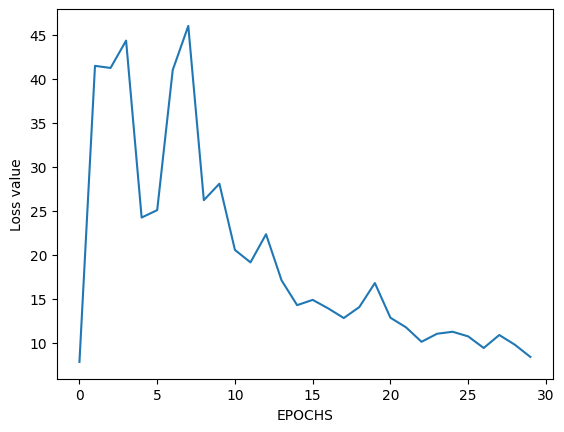

In [42]:
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

## Accuracy

In [43]:
_, _, _, y_test_hat = forward_prop(w1, w2, b1, b2, X_test)
y_test_hat_true = np.argmax(y_test_hat, axis=1)
accuracy = accuracy_score(y_test_true, y_test_hat_true)
print(f'loss: {loss:.2f}, acc: {accuracy:.2f}')

loss: 8.43, acc: 0.81
